In [2]:
import pandas as pd

In [3]:
import json
import matplotlib.pyplot

--------------

*Load the Different Datasets*

In [4]:
sale_csv = pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')

In [5]:
sale_xls = pd.read_excel("Sales.xlsx")

In [6]:
with open("sales.json", "r") as file:
    data = json.load(file)

In [7]:
sale_json = pd.DataFrame.from_dict(data, orient='index')

In [8]:
sale_csv.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
sale_xls.head()

,SALES_ID,SALES_BY_REGION,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
0,16,UAQ,n.a.,5941,3487,-1,5433,3511,2555,n.a.,1929,4285,1198,-1
1,10,FUJ,1085,5189,n.a.,1142,1951,3967,1993,5116,3785,2733,5686,n.a.
2,28,AUH,-1,1796,2472,4829,2194,-1,1142,1674,5857,1500,3219,5033
3,8,DXB,3490,not avilable,1317,2351,1864,n.a.,4161,1131,2173,4005,5238,1396
4,5,FUJ,2152,3064,3981,2958,3794,5453,3324,n.a.,1516,5640,1301,5513


In [10]:
sale_json.head()

,0
swagger,2.0
info,{'description': 'The Selling Partner API for S...
host,sellingpartnerapi-na.amazon.com
schemes,[https]
consumes,[application/json]


--------------------------

*Merge the datasets*

In [11]:
df = pd.concat([sale_csv, sale_json, sale_xls], ignore_index=True)

In [12]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10121.0,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10134.0,41.0,94.74,2.0,3884.34,7/1/2003 0:00,Shipped,3.0,7.0,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10145.0,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,8.0,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10159.0,49.0,100.00,14.0,5205.27,10/10/2003 0:00,Shipped,4.0,10.0,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape

(2929, 40)

In [14]:
df.dtypes

ORDERNUMBER         float64
QUANTITYORDERED     float64
PRICEEACH           float64
ORDERLINENUMBER     float64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID              float64
MONTH_ID            float64
YEAR_ID             float64
PRODUCTLINE          object
MSRP                float64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
0                    object
SALES_ID            float64
SALES_BY_REGION      object
JANUARY              object
FEBRUARY             object
MARCH                object
APRIL               float64
MAY                 float64
JUNE                 object
JULY                 object
AUGUST              

--------------

*Handle Missing Values*

In [15]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (dict, list))).any():
        df[col] = df[col].apply(str)

df.drop_duplicates(inplace=True)

In [16]:
df.shape

(2928, 40)

In [17]:
df.isnull().sum()

ORDERNUMBER          105
QUANTITYORDERED      105
PRICEEACH            105
ORDERLINENUMBER      105
SALES                105
ORDERDATE            105
STATUS               105
QTR_ID               105
MONTH_ID             105
YEAR_ID              105
PRODUCTLINE          105
MSRP                 105
PRODUCTCODE          105
CUSTOMERNAME         105
PHONE                105
ADDRESSLINE1         105
ADDRESSLINE2        2626
CITY                 105
STATE               1591
POSTALCODE           181
COUNTRY              105
TERRITORY           1179
CONTACTLASTNAME      105
CONTACTFIRSTNAME     105
DEALSIZE             105
0                      0
SALES_ID            2830
SALES_BY_REGION     2830
JANUARY             2830
FEBRUARY            2830
MARCH               2830
APRIL               2830
MAY                 2830
JUNE                2830
JULY                2830
AUGUST              2830
SEPTEMBER           2830
OCTOBER             2830
NOVEMBER            2830
DECEMBER            2830


In [18]:
df.fillna(method='ffill', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9548\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [19]:
df.shape

(2928, 40)

In [20]:
df.columns

Index([     'ORDERNUMBER',  'QUANTITYORDERED',        'PRICEEACH',
        'ORDERLINENUMBER',            'SALES',        'ORDERDATE',
                 'STATUS',           'QTR_ID',         'MONTH_ID',
                'YEAR_ID',      'PRODUCTLINE',             'MSRP',
            'PRODUCTCODE',     'CUSTOMERNAME',            'PHONE',
           'ADDRESSLINE1',     'ADDRESSLINE2',             'CITY',
                  'STATE',       'POSTALCODE',          'COUNTRY',
              'TERRITORY',  'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
               'DEALSIZE',                  0,         'SALES_ID',
        'SALES_BY_REGION',          'JANUARY',         'FEBRUARY',
                  'MARCH',            'APRIL',              'MAY',
                   'JUNE',             'JULY',           'AUGUST',
              'SEPTEMBER',          'OCTOBER',         'NOVEMBER',
               'DECEMBER'],
      dtype='object')

-----------------------------------------------------------------------------------------

*Data Transformation*

In [21]:
df[['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']] = \
df[['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']].apply(pd.to_numeric, errors='coerce')

In [22]:
df['TOTAL_SALE'] = df[['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']].sum(axis=1)

In [23]:
df['AVG_ORDER_VALUE'] = df['SALES'] / df['QUANTITYORDERED']

-------

*Analyze the sale*

In [64]:
total_sales = df['TOTAL_SALE'].sum()
total_sales

3848604.0

In [66]:
avg_order_value = df['AVG_ORDER_VALUE'].mean()
avg_order_value

99.88138619509662

In [68]:
product_category_distribution = df['PRODUCTLINE'].value_counts(normalize=True) * 100
product_category_distribution

PRODUCTLINE
Classic Cars        33.025956
Vintage Cars        20.730874
Ships               11.577869
Motorcycles         11.304645
Planes              10.450820
Trucks and Buses    10.280055
Trains               2.629781
Name: proportion, dtype: float64

------------

*Visualizations*

<Axes: title={'center': 'Total Sales by Product Line'}, xlabel='PRODUCTLINE'>

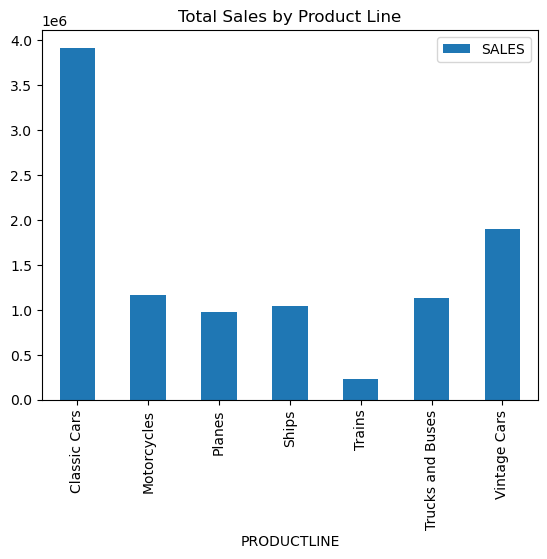

In [74]:
df[['PRODUCTLINE', 'SALES']].groupby('PRODUCTLINE').sum().plot(kind='bar', title="Total Sales by Product Line")

<Axes: title={'center': 'Deal Size Distribution'}, ylabel='count'>

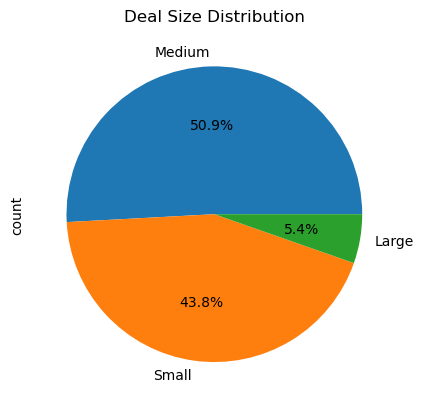

In [76]:
df['DEALSIZE'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Deal Size Distribution")

<Axes: title={'center': 'PRODUCTLINE Distribution'}, ylabel='count'>

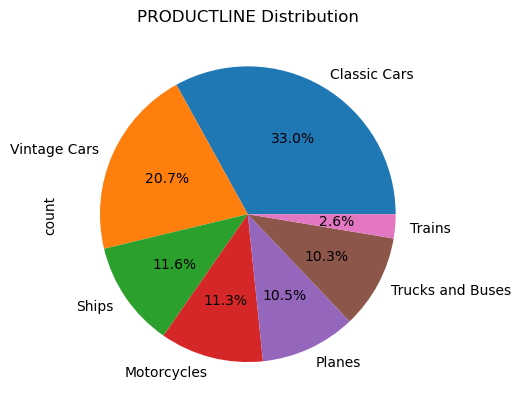

In [80]:
df['PRODUCTLINE'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="PRODUCTLINE Distribution")